In [1]:
%matplotlib notebook
import seaborn as sns
sns.set_context('notebook')

In [7]:
from pathlib import Path
datadir = Path('/Users/klay6683/data/iuvs')
hk = pd.read_hdf(str(datadir / 'HK_DB.h5'), 'df')

In [35]:
l1ascan = pd.read_hdf(str(datadir / 'l1a_dark_scan.h5'), 'df')

In [10]:
from iuvs import meta

In [37]:
l1ascan = meta.clean_up_dark_scan(l1ascan)

In [39]:
l1ascan.set_index('TIME_OF_INT', inplace=True)

In [40]:
l1ascan.index

DatetimeIndex(['2015-03-08 05:11:57.868780', '2015-03-08 05:11:59.868780',
               '2015-01-25 20:45:08.450050', '2015-01-25 20:45:23.450060',
               '2015-01-25 20:45:38.450070', '2015-01-25 20:45:53.450070',
               '2015-01-25 20:46:08.450080', '2015-01-25 20:46:23.450090',
               '2015-01-25 20:46:38.450100', '2015-01-25 20:46:53.450110', 
               ...
               '2015-01-25 20:02:00.959480', '2015-01-20 23:15:56.652810',
               '2015-01-20 23:16:01.452800', '2015-07-29 07:13:00.238510',
               '2015-07-29 07:13:15.238520', '2014-09-22 22:43:51.062320',
               '2015-01-25 22:39:42.174830', '2014-10-14 13:47:56.696000',
               '2014-10-14 13:47:58.696000', '2014-10-21 15:31:26.005310'],
              dtype='datetime64[ns]', name='TIME_OF_INT', length=51306, freq=None, tz=None)

In [41]:
l1ascan = l1ascan.sort_index()

In [42]:
l1ascan.loc[(l1ascan.index.year==2015) & (l1ascan.CHANNEL=='MUV'), 'DET_TEMP'].head()

TIME_OF_INT
2015-01-01 00:20:03.693870   -22.3078
2015-01-01 00:20:18.693870   -22.1580
2015-01-01 03:13:22.393330   -23.0568
2015-01-01 03:13:27.193320   -23.0568
2015-01-01 03:13:39.644900   -23.0568
Name: DET_TEMP, dtype: float64

In [43]:
hk.loc['2015-01-01 00:20', 'MUV_DET_TEMP_C'].head()

2015-01-01 00:20:21.156957864   -19.864255
2015-01-01 00:20:51.156982183   -19.848978
Name: MUV_DET_TEMP_C, dtype: float64

In [44]:
timeres = '5min'
df = hk.resample(timeres).dropna(how='all')
std = hk.resample(timeres, how='std').dropna(how='all')

In [45]:
muv = l1ascan[l1ascan.CHANNEL=='MUV'].resample(timeres).dropna(how='all')
muverrors = l1ascan[l1ascan.resample(timeres, how='std').dropna(how='all')

In [47]:
l1aresamp.columns

Index(['CADENCE', 'CASE_TEMP', 'DET_TEMP', 'DUTY_CYCLE', 'FOV_DEG', 'INT_TIME',
       'LYA_CENTROID', 'MCP_VOLT', 'MIRROR_DEG', 'MIRROR_DN', 'MIR_DEG',
       'NAXIS', 'NAXIS1', 'NAXIS2', 'NAXIS3', 'N_FILL', 'OBS_ID',
       'ORBIT_NUMBER', 'SOLAR_LONGITUDE', 'mean', 'median', 'std'],
      dtype='object')

In [26]:
l1aresamp.join(df).dropna(how='all')[['MUV_DET_TEMP_C']]

,CADENCE,CASE_TEMP,DET_TEMP,DUTY_CYCLE,FOV_DEG,INT_TIME,LYA_CENTROID,MCP_VOLT,MIRROR_DEG,MIRROR_DN,...,MUV_DET_TEMP_C,MUV_INT_TEMP_C,OP_1_HTR_TEMP_C,OP_2_HTR_TEMP_C,POWER_BD1_TEMP_C,POWER_BD2_TEMP_C,PROC_BD_TEMP_C,SCAN_MOT_TEMP_C,ZONE_1_HTR_TEMP_C,ZONE_2_HTR_TEMP_C
TIME_OF_INT,,,,,,,,,,,,,,,,,,,,,
2013-12-04 19:00:00,2.0,15.194311,-3.882400,1,-48.581543,1.00,1,559.980,-24.290771,4095.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-11 21:00:00,61.0,20.072489,0.087300,1,7.196045,60.00,1,846.558,3.598022,14249.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-11 21:40:00,61.0,23.684031,3.008400,1,7.196045,60.00,1,846.558,3.598022,14249.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-11 22:15:00,61.0,25.587571,4.806000,1,7.196045,60.00,1,846.558,3.598022,14249.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-11 22:55:00,61.0,25.897679,5.355267,1,13.421631,60.00,1,846.558,6.710815,15382.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-11 23:30:00,61.0,26.048706,6.229100,1,11.392822,60.00,1,846.558,5.696411,15013.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-12 00:10:00,61.0,26.133852,7.165350,1,11.392822,60.00,1,846.558,5.696411,15013.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-12 00:50:00,61.0,26.209655,7.727100,1,11.392822,60.00,1,846.558,5.696411,15013.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-12 01:30:00,61.0,26.257088,8.176500,1,13.568115,60.00,1,846.558,6.784058,15409.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


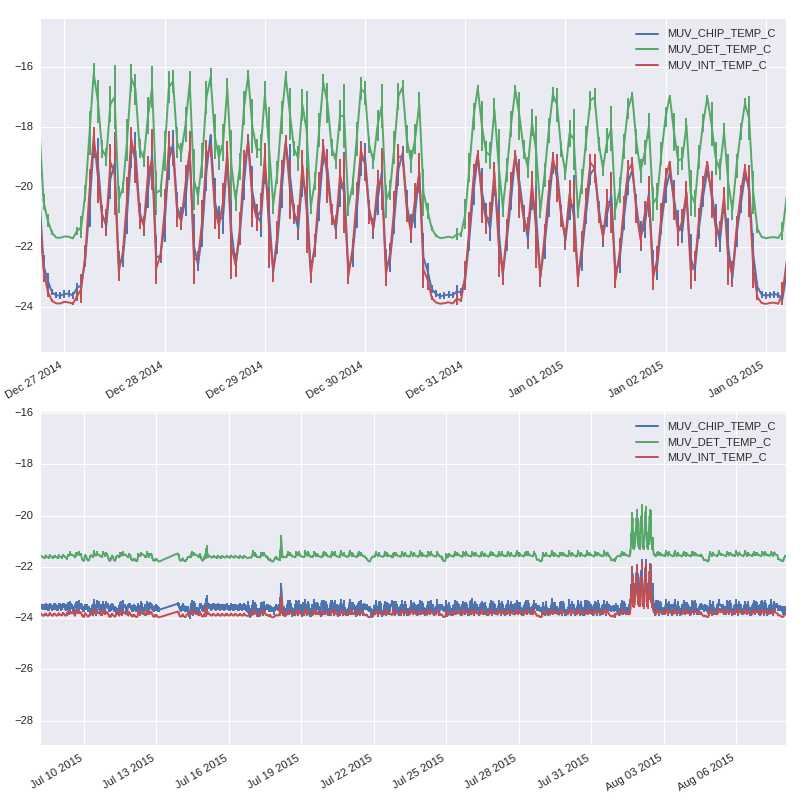

In [8]:
fig, ax = plt.subplots(nrows=2, figsize=(10,10))
df.filter(regex='^MUV_').plot(ax=ax[0], yerr=std)

df.filter(regex='^MUV_').plot(ax=ax[1], yerr=std)

# df.filter(regex='^IUVS_._TEMP_C').plot(ax=ax[2],yerr =std)
plt.tight_layout()

In [10]:
df.columns

Index(['FUV_CHIP_TEMP_C', 'FUV_DET_TEMP_C', 'FUV_INT_TEMP_C',
       'GRAT_MOT_TEMP_C', 'HV_POWR_TEMP_C', 'IUVS_1_TEMP_C', 'IUVS_2_TEMP_C',
       'IUVS_3_TEMP_C', 'IUVS_4_TEMP_C', 'IUVS_5_TEMP_C', 'MUV_CHIP_TEMP_C',
       'MUV_DET_TEMP_C', 'MUV_INT_TEMP_C', 'OP_1_HTR_TEMP_C',
       'OP_2_HTR_TEMP_C', 'POWER_BD1_TEMP_C', 'POWER_BD2_TEMP_C',
       'PROC_BD_TEMP_C', 'SCAN_MOT_TEMP_C', 'ZONE_1_HTR_TEMP_C',
       'ZONE_2_HTR_TEMP_C'],
      dtype='object')

<IPython.core.display.Javascript object>


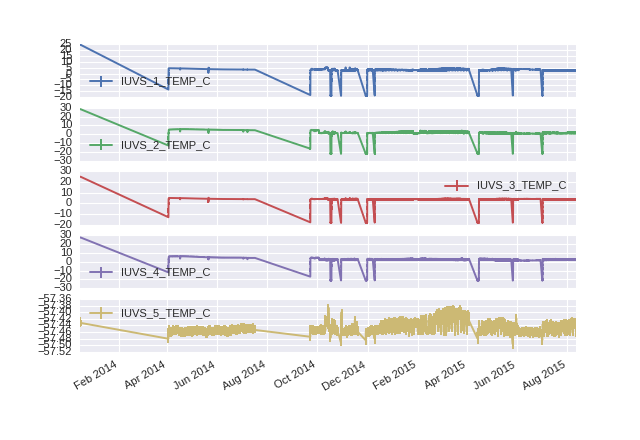

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa55a38da58>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fa55b6f01d0>], dtype=object)

In [6]:
df.filter(regex='^IUVS_._TEMP_C').plot(yerr=std, subplots=True)

# Seaborn PairPlot

In [ ]:
g = sns.PairGrid(df.filter(regex='IUVS_._TEMP_C'))
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6)

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips.head()

In [ ]:
tips.day.value_counts().index

In [ ]:
attend = sns.load_dataset('attention').query('subject <=12')

In [ ]:
attend